In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import pickle
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('data/users.csv')

df

,id,Nombre,E-mail,Relación VIH,Edad,Sexo,Ciudad,Fecha creación usuario,Primer login,Last login,Egresión,Media tiempo test,Cursos apuntados,Insignias
0,1,Nombre_1,Nombre_1@gmail.com,Otros,20,Mujer,Barcelona,2023-03-15,2023-03-19,2023-03-15,Abandono,0,2,1
1,2,Nombre_2,Nombre_2@gmail.com,Interesado,21,Hombre,Barcelona,2023-03-15,2023-03-19,2023-03-14,Abandono,12,1,0
2,3,Nombre_3,Nombre_3@gmail.com,Afectado,78,Mujer,Madrid,2023-02-28,2023-03-03,2023-03-15,No tiene cursos empezados,0,0,0
3,4,Nombre_4,Nombre_4@gmail.com,Profesional,75,Mujer,Madrid,2023-03-06,2023-03-08,2023-03-15,Ha completado más de 2 cursos,2,2,5
4,5,Nombre_5,Nombre_5@gmail.com,Profesional,26,Hombre,Madrid,2023-03-07,2023-03-12,2023-03-13,Ha completado más de 2 cursos,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Nombre_496,Nombre_496@gmail.com,Otros,78,Otros,Barcelona,2023-03-01,2023-03-03,2023-03-14,Abandono,15,1,1
496,497,Nombre_497,Nombre_497@gmail.com,Interesado,18,Otros,Barcelona,2023-03-07,2023-03-09,2023-03-13,Abandono,15,1,0
497,498,Nombre_498,Nombre_498@gmail.com,Familiar,78,Hombre,Madrid,2023-03-09,2023-03-13,2023-03-14,No tiene cursos empezados,0,0,0
498,499,Nombre_499,Nombre_499@gmail.com,Profesional,74,Hombre,Madrid,2023-02-26,2023-03-01,2023-03-13,Ha completado más de 2 cursos,4,5,3


In [3]:
df['id'] = df['id'].astype(int)
df['Edad'] = df['Edad'].astype(int)
df['Media tiempo test'] = df['Media tiempo test'].astype(int)
df['Cursos apuntados'] = df['Cursos apuntados'].astype(int)
df['Insignias'] = df['Insignias'].astype(int)

In [4]:
mapping = {
    'Ha completado más de 2 cursos': 1,
    'Abandono': 2,
    'Tiene cursos no superados': 3,
    'Tiene cursos pendientes': 4,
    'No tiene cursos empezados': 5
}

In [5]:
df['Egresión'] = df['Egresión'].replace(mapping)

In [6]:
mappingrel = {
    'Otros': 1,
    'Afectado': 2,
    'Profesional': 3,
    'Familiar': 4,
    'Amigo': 5,
    'Interesado': 6
}

In [7]:
df['Relación VIH'] = df['Relación VIH'].replace(mappingrel)

In [8]:
df2 = pd.get_dummies(df, columns=['Ciudad'])

In [9]:
df2 = pd.get_dummies(df2, columns=['Sexo'])

In [10]:
df2

,id,Nombre,E-mail,Relación VIH,Edad,Fecha creación usuario,Primer login,Last login,Egresión,Media tiempo test,Cursos apuntados,Insignias,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Otros,Sexo_Hombre,Sexo_Mujer,Sexo_Otros
0,1,Nombre_1,Nombre_1@gmail.com,1,20,2023-03-15,2023-03-19,2023-03-15,2,0,2,1,1,0,0,0,1,0
1,2,Nombre_2,Nombre_2@gmail.com,6,21,2023-03-15,2023-03-19,2023-03-14,2,12,1,0,1,0,0,1,0,0
2,3,Nombre_3,Nombre_3@gmail.com,2,78,2023-02-28,2023-03-03,2023-03-15,5,0,0,0,0,1,0,0,1,0
3,4,Nombre_4,Nombre_4@gmail.com,3,75,2023-03-06,2023-03-08,2023-03-15,1,2,2,5,0,1,0,0,1,0
4,5,Nombre_5,Nombre_5@gmail.com,3,26,2023-03-07,2023-03-12,2023-03-13,1,3,4,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Nombre_496,Nombre_496@gmail.com,1,78,2023-03-01,2023-03-03,2023-03-14,2,15,1,1,1,0,0,0,0,1
496,497,Nombre_497,Nombre_497@gmail.com,6,18,2023-03-07,2023-03-09,2023-03-13,2,15,1,0,1,0,0,0,0,1
497,498,Nombre_498,Nombre_498@gmail.com,4,78,2023-03-09,2023-03-13,2023-03-14,5,0,0,0,0,1,0,1,0,0
498,499,Nombre_499,Nombre_499@gmail.com,3,74,2023-02-26,2023-03-01,2023-03-13,1,4,5,3,0,1,0,1,0,0


In [11]:
df2['Fecha creación usuario'] = pd.to_datetime(df['Fecha creación usuario'])

In [12]:
df2['Primer login'] = pd.to_datetime(df['Primer login'])
df2['Last login'] = pd.to_datetime(df['Last login'])

In [13]:
df2['Fecha1'] = df2['Fecha creación usuario'].apply(lambda x: x.toordinal())

In [14]:
df2['Flogin'] = df2['Primer login'].apply(lambda x: x.toordinal())
df2['Llogin'] = df2['Last login'].apply(lambda x: x.toordinal())

In [15]:
dfd = df2[['Relación VIH', 'Edad', 'Media tiempo test', 'Cursos apuntados', 'Insignias', 'Ciudad_Barcelona', 'Ciudad_Madrid', 'Ciudad_Otros', 
           'Sexo_Hombre', 'Sexo_Mujer', 'Sexo_Otros', 'Fecha1', 'Flogin', 'Llogin', 'Egresión']]

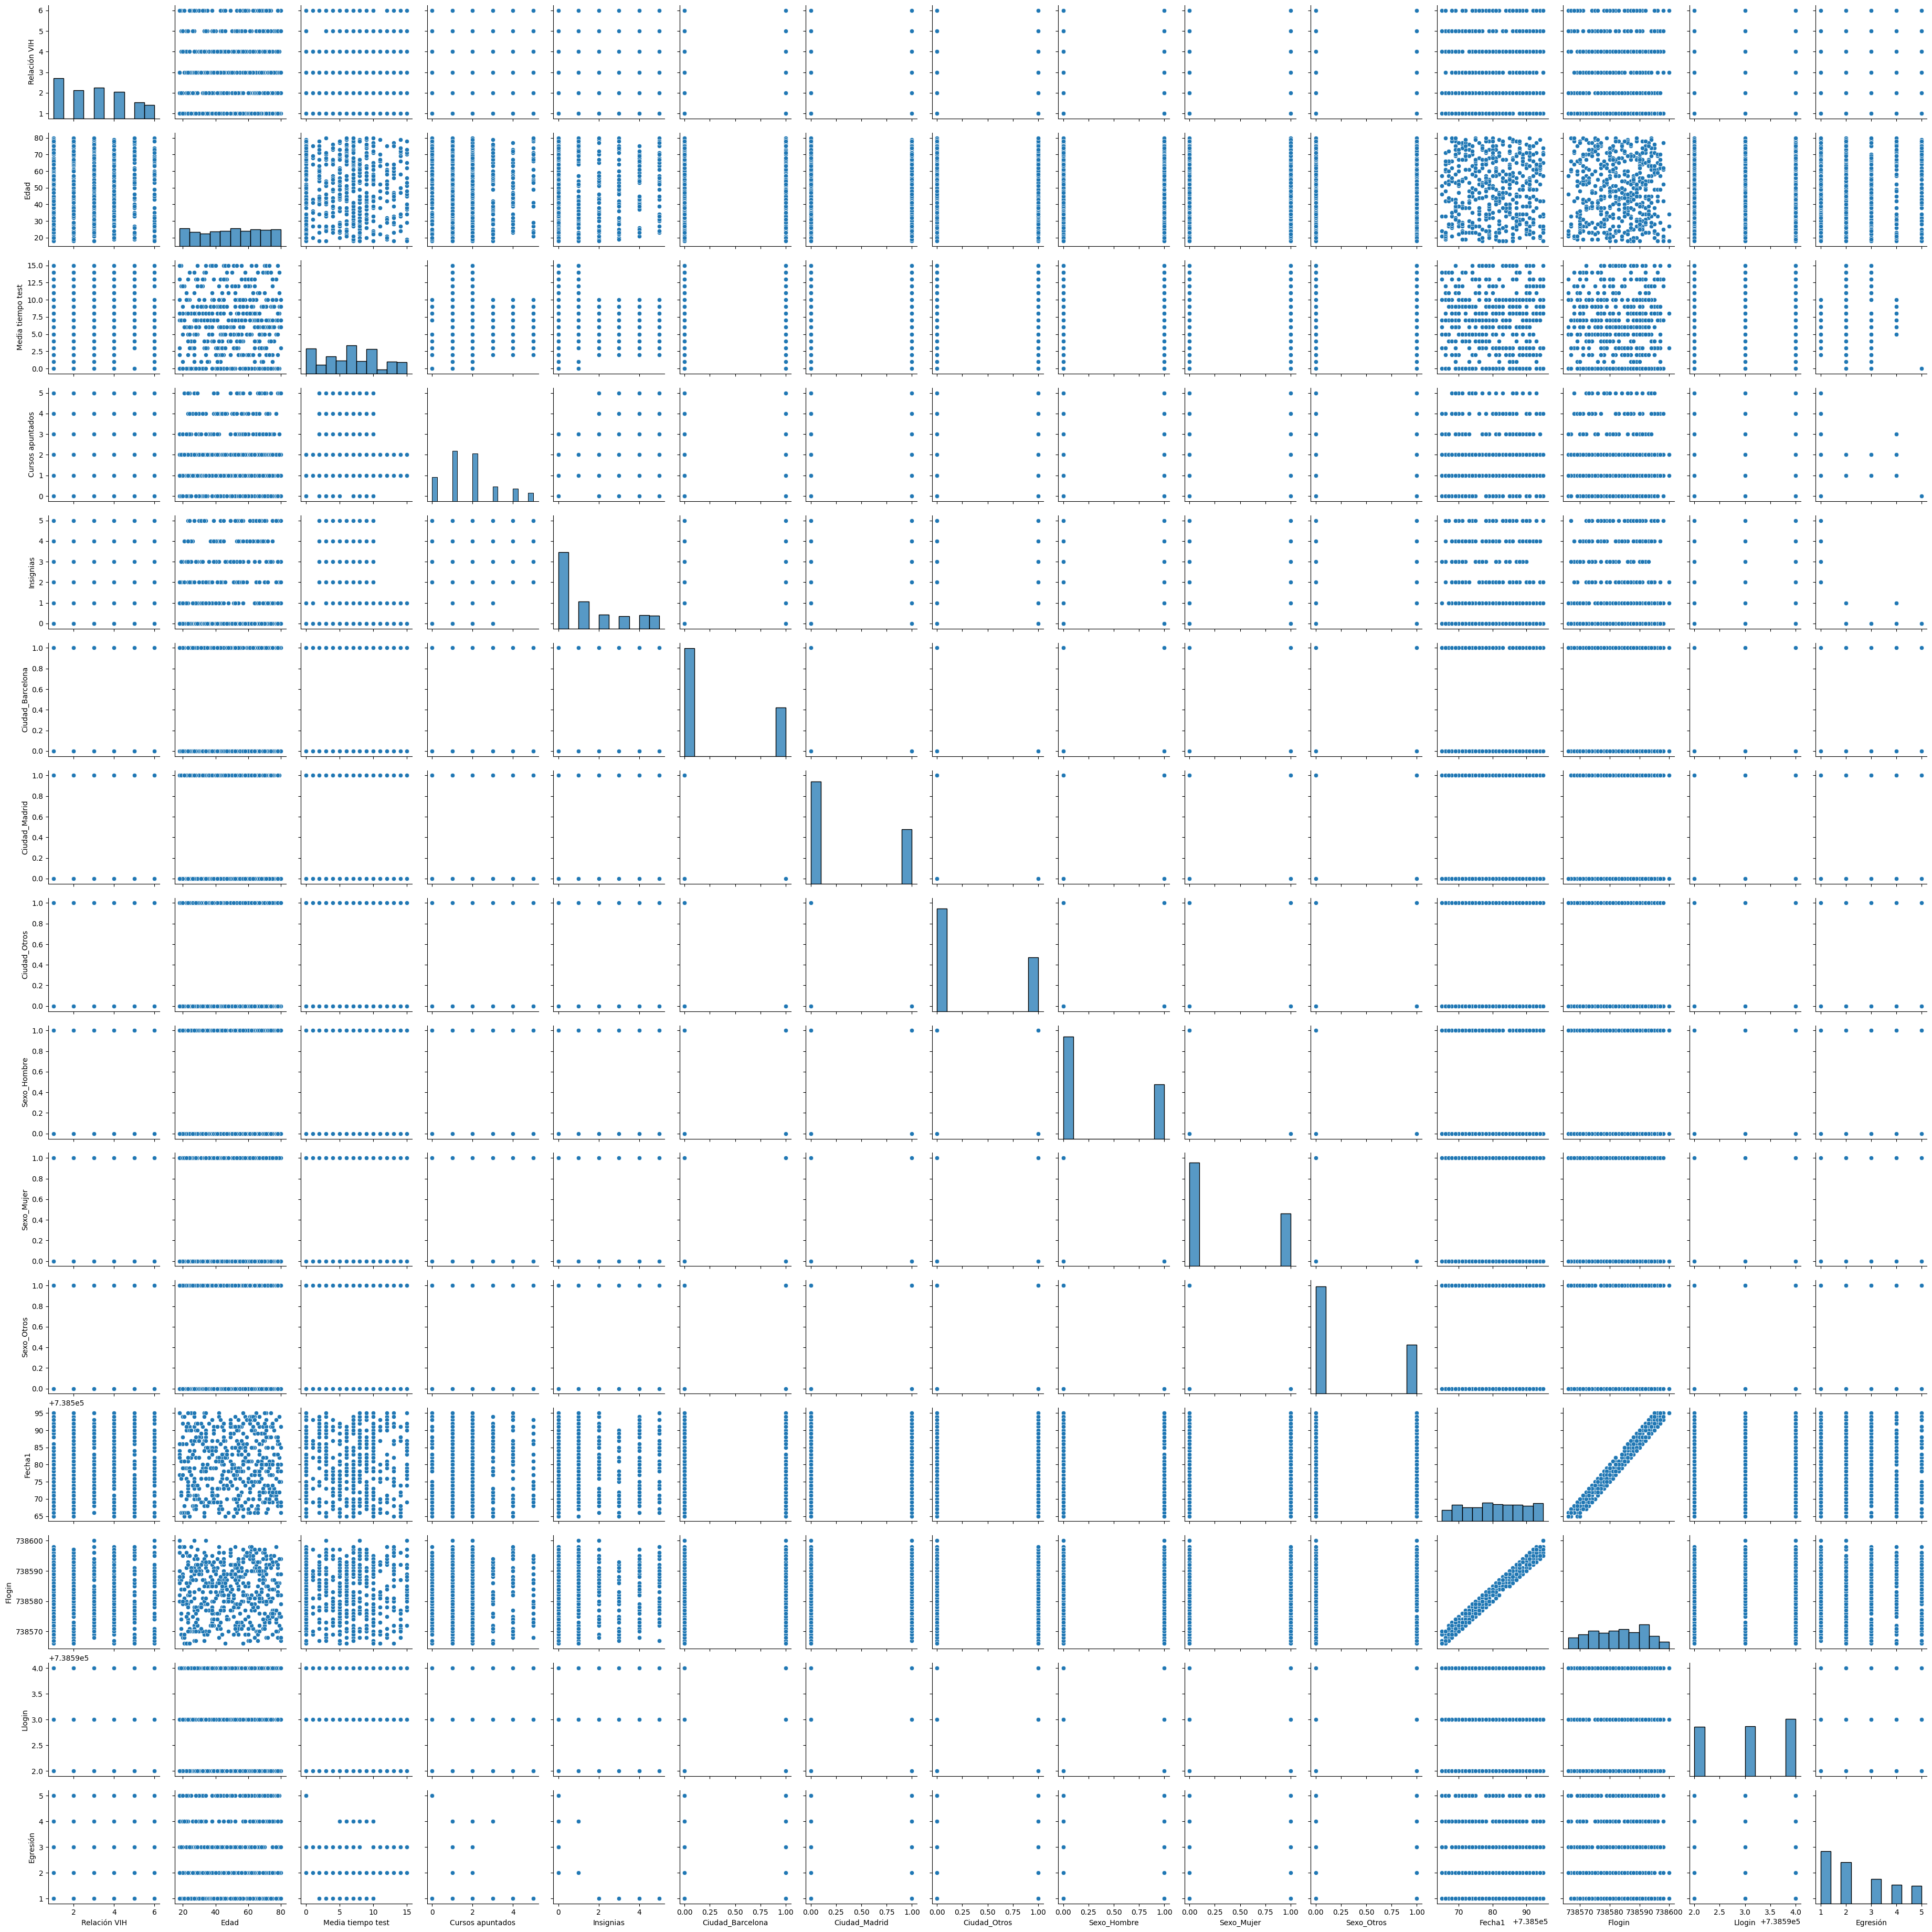

In [49]:
sns.pairplot(dfd)

<AxesSubplot:>

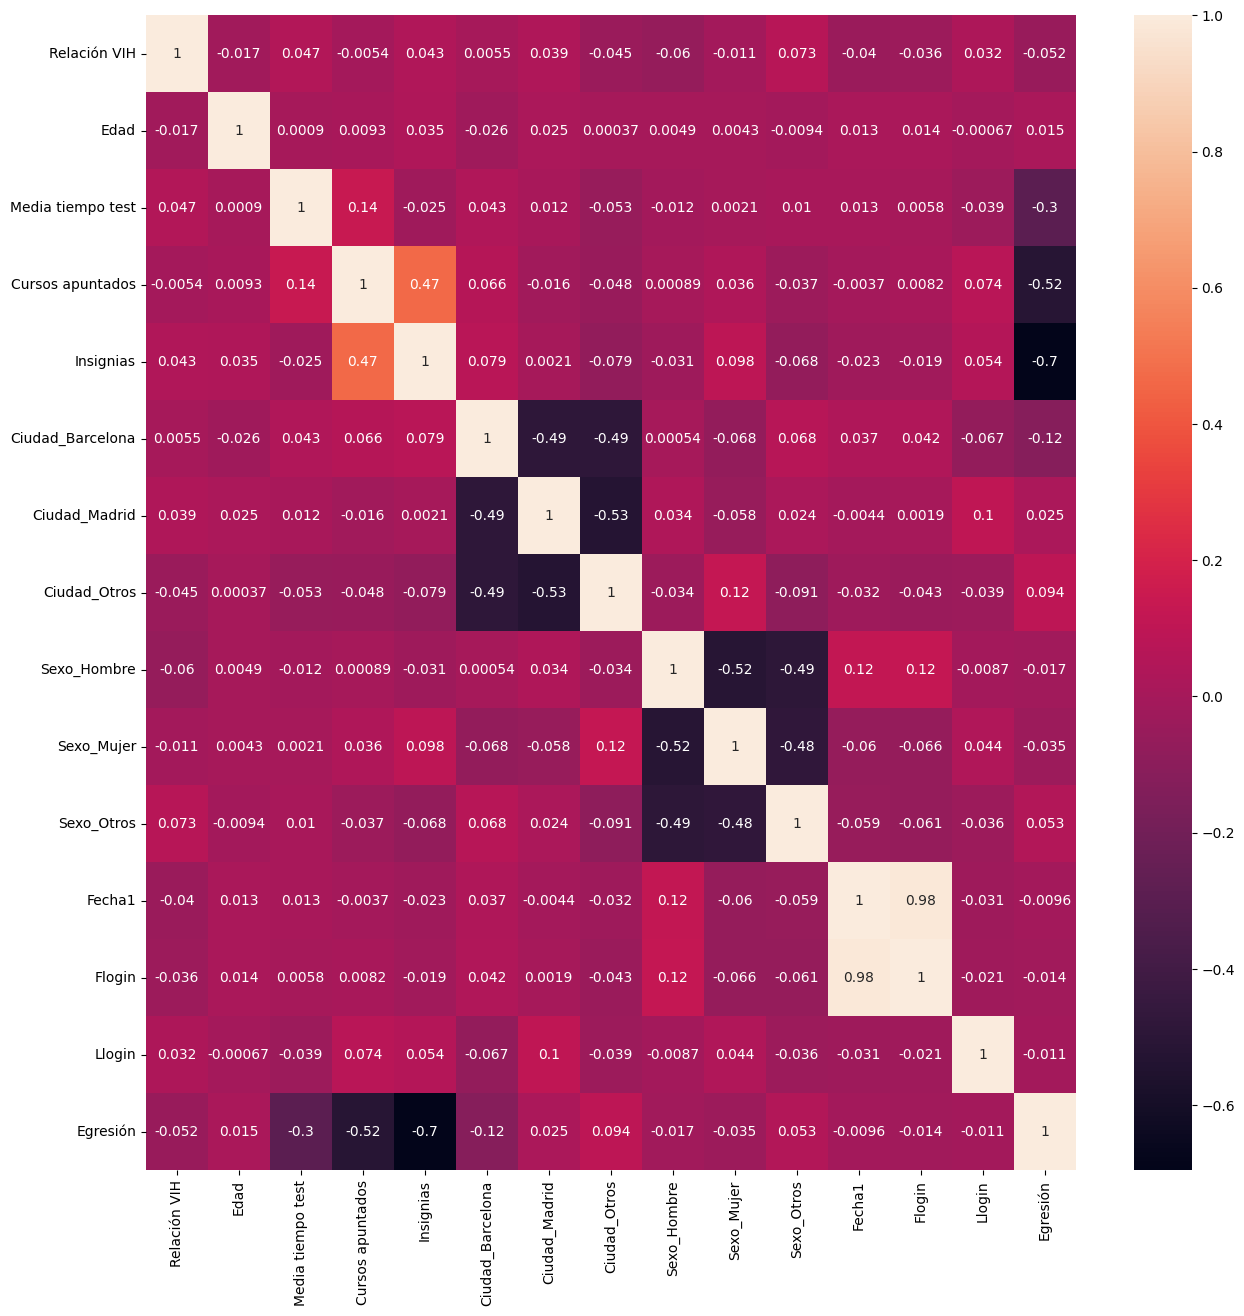

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(dfd.corr(), annot=True)

In [17]:
dfd.to_csv('model.csv', index=False)

In [127]:
dfd = pd.read_csv('model.csv')

In [128]:
dfd

,Relación VIH,Edad,Media tiempo test,Cursos apuntados,Insignias,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Otros,Sexo_Hombre,Sexo_Mujer,Sexo_Otros,Fecha1,Flogin,Llogin,Egresión
0,1,20,0,2,1,1,0,0,0,1,0,738594,738598,738594,2
1,6,21,12,1,0,1,0,0,1,0,0,738594,738598,738593,2
2,2,78,0,0,0,0,1,0,0,1,0,738579,738582,738594,5
3,3,75,2,2,5,0,1,0,0,1,0,738585,738587,738594,1
4,3,26,3,4,4,0,1,0,1,0,0,738586,738591,738592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,78,15,1,1,1,0,0,0,0,1,738580,738582,738593,2
496,6,18,15,1,0,1,0,0,0,0,1,738586,738588,738592,2
497,4,78,0,0,0,0,1,0,1,0,0,738588,738592,738593,5
498,3,74,4,5,3,0,1,0,1,0,0,738577,738580,738592,1


In [129]:
X = dfd.iloc[:,:-1]
y = dfd['Egresión']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 14)
(100, 14)
(400,)
(100,)


# models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### scaler

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
lr_model = LogisticRegression(random_state=42)
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("Regresión logística CV score: ", lr_scores.mean())

Regresión logística CV score:  0.7075


              Feature  Importance
4           Insignias    0.500134
2   Media tiempo test    0.232127
3    Cursos apuntados    0.130352
1                Edad    0.035371
12             Flogin    0.026539
11             Fecha1    0.025683
0        Relación VIH    0.016611
13             Llogin    0.010110
5    Ciudad_Barcelona    0.009734
8         Sexo_Hombre    0.005319
7        Ciudad_Otros    0.003940
10         Sexo_Otros    0.002055
6       Ciudad_Madrid    0.001285
9          Sexo_Mujer    0.000738


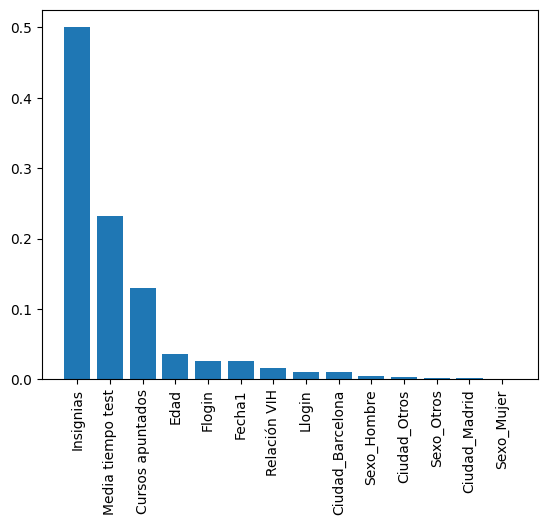

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear un modelo de Gradient Boosting Classifier
gbr_model = GradientBoostingClassifier()

# Entrenar el modelo con los datos de entrenamiento
gbr_model.fit(X_train_scaled, y_train)

# Obtener las importancias de los features
importances = gbr_model.feature_importances_

# Crear un dataframe con las importancias de los features
importances_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})

# Ordenar el dataframe por importancia descendente
importances_df = importances_df.sort_values(by="Importance", ascending=False)

# Imprimir el dataframe
print(importances_df)

# Visualizar las importancias en un gráfico de barras
plt.bar(importances_df["Feature"], importances_df["Importance"])
plt.xticks(rotation=90)
plt.show()

In [87]:
y_gbr = gbr_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_gbr)
acc

0.76

## Decission Tree

In [81]:
dt_model = DecisionTreeClassifier(random_state=17)
param_grid = {'max_depth': [2, 3, 4, 5]}
dt_grid = GridSearchCV(dt_model, param_grid, cv=5)
dt_grid.fit(X_train_scaled, y_train)
print("Árbol de decisión mejor profundidad: ", dt_grid.best_params_['max_depth'])
print("Árbol de decisión CV score: ", dt_grid.best_score_)

Árbol de decisión mejor profundidad:  4
Árbol de decisión CV score:  0.745


In [83]:
y_pred = dt_grid.predict(X_test_scaled)

# Calcular el accuracy del modelo de Naive Bayes
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el accuracy
print(f"Accuracy del modelo de Decission Tree: {accuracy:.3f}")

Accuracy del modelo de Decission Tree: 0.790


              Feature  Importance
4           Insignias    0.659978
3    Cursos apuntados    0.340022
0        Relación VIH    0.000000
1                Edad    0.000000
2   Media tiempo test    0.000000
5    Ciudad_Barcelona    0.000000
6       Ciudad_Madrid    0.000000
7        Ciudad_Otros    0.000000
8         Sexo_Hombre    0.000000
9          Sexo_Mujer    0.000000
10         Sexo_Otros    0.000000
11             Fecha1    0.000000
12             Flogin    0.000000
13             Llogin    0.000000


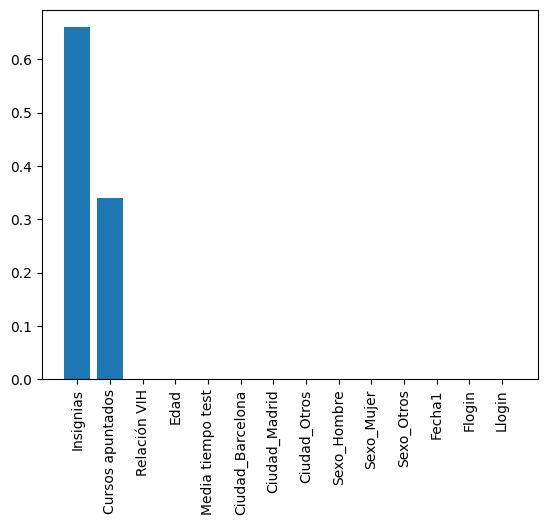

In [84]:

# Crear un modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=4)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train_scaled, y_train)

# Obtener las importancias de los features
importances = tree_model.feature_importances_

# Crear un dataframe con las importancias de los features
importances_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})

# Ordenar el dataframe por importancia descendente
importances_df = importances_df.sort_values(by="Importance", ascending=False)

# Imprimir el dataframe
print(importances_df)

# Visualizar las importancias en un gráfico de barras
plt.bar(importances_df["Feature"], importances_df["Importance"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
svm_model = SVC(random_state=42)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm_model, param_grid, cv=5)
svm_grid.fit(X_train_scaled, y_train)
print("Máquinas de soporte vectorial mejores parámetros: ", svm_grid.best_params_)
print("Máquinas de soporte vectorial CV score: ", svm_grid.best_score_)


Máquinas de soporte vectorial mejores parámetros:  {'C': 10, 'gamma': 0.1}
Máquinas de soporte vectorial CV score:  0.6699999999999999


# candidato Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=10)
print("Naive Bayes CV score: ", nb_scores.mean())

Naive Bayes CV score:  0.7475


In [ ]:
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

# Calcular el accuracy del modelo de Naive Bayes
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el accuracy
print(f"Accuracy del modelo de Naive Bayes: {accuracy:.3f}")

Accuracy del modelo de Naive Bayes: 0.700


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn_model, param_grid, cv=5)
knn_grid.fit(X_train_scaled, y_train)
print("KNN mejor número de vecinos: ", knn_grid.best_params_['n_neighbors'])
print("KNN CV score: ", knn_grid.best_score_)

KNN mejor número de vecinos:  7
KNN CV score:  0.5700000000000001


# candidato1

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=17)
param_grid = {'n_estimators': [50, 51, 52], 'max_depth': [13, 14, 15, 16, 17]}
rf_grid = GridSearchCV(rf_model, param_grid, cv=5)
rf_grid.fit(X_train_scaled, y_train)
print("Random Forest mejores parámetros: ", rf_grid.best_params_)
print("Random Forest CV score: ", rf_grid.best_score_)

Random Forest mejores parámetros:  {'max_depth': 15, 'n_estimators': 51}
Random Forest CV score:  0.765


In [97]:
print(rf_grid.best_estimator_)
print(" ")
print(rf_grid.best_score_)
print(" ")
print(rf_grid.best_params_)

RandomForestClassifier(max_depth=15, n_estimators=51, random_state=17)
 
0.765
 
{'max_depth': 15, 'n_estimators': 51}


In [94]:
rf_model = RandomForestClassifier(random_state=17, n_estimators=51, max_depth=15)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_

In [99]:
y_rf = rf_model.predict(X_test_scaled)
acc2 = accuracy_score(y_rf, y_test)
acc2

0.79

In [96]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
4,Insignias,0.338967
2,Media tiempo test,0.163624
3,Cursos apuntados,0.146401
11,Fecha1,0.067554
12,Flogin,0.066519
1,Edad,0.066080
0,Relación VIH,0.046067
13,Llogin,0.029307
5,Ciudad_Barcelona,0.015796
8,Sexo_Hombre,0.014420


In [60]:
import plotly.graph_objects as go

# Crear figura y datos para el gráfico de pastel
fig = go.Figure(data=[go.Pie(labels=feature_importances['feature'], 
                             values=feature_importances['importance'],
                             hole=0.3)])

# Agregar título y leyenda
fig.update_layout(title='Feature Importances',
                  legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

# Mostrar gráfico
fig.show()

In [76]:
accuracy = accuracy_score(y_test, y_rf)

accuracy

0.79

# pickle

In [100]:
with open('rfmodel', 'wb') as archivo_salida:
    pickle.dump(rf_model, archivo_salida)

In [116]:
with open('rfmodel', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [117]:
loaded_model

RandomForestClassifier(max_depth=15, n_estimators=51, random_state=17)

## Test

In [124]:
new_data = [[3, #Relación VIH, profesional en este caso
             48, #Edad
             7, #Media tiempo test
             5, #Cursos apuntados
             0, #Insignias
             0, 0, 1, #Ciudad(Otros en este caso)
             1, 0, 0, #Sexo(Hombre en este caso)
             738568, #Fecha registro
             738591, #Fecha primer login
             738592 #Fecha ultimo login
             ]]

In [125]:
prediccion = loaded_model.predict(new_data)
prediccion #predicción 4:Tiene cursos pendientes

array([4], dtype=int64)

In [140]:
dfd

,Relación VIH,Edad,Media tiempo test,Cursos apuntados,Insignias,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Otros,Sexo_Hombre,Sexo_Mujer,Sexo_Otros,Fecha1,Flogin,Llogin,Egresión
0,1,20,0,2,1,1,0,0,0,1,0,738594,738598,738594,2
1,6,21,12,1,0,1,0,0,1,0,0,738594,738598,738593,2
2,2,78,0,0,0,0,1,0,0,1,0,738579,738582,738594,5
3,3,75,2,2,5,0,1,0,0,1,0,738585,738587,738594,1
4,3,26,3,4,4,0,1,0,1,0,0,738586,738591,738592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,78,15,1,1,1,0,0,0,0,1,738580,738582,738593,2
496,6,18,15,1,0,1,0,0,0,0,1,738586,738588,738592,2
497,4,78,0,0,0,0,1,0,1,0,0,738588,738592,738593,5
498,3,74,4,5,3,0,1,0,1,0,0,738577,738580,738592,1


In [159]:
equis = dfd.iloc[:,:-1]

In [160]:
pred = loaded_model.predict(equis)

c:\Users\PCCOM\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [161]:
unique, counts = np.unique(pred, return_counts=True)

for val, count in zip(unique, counts):
    print(f"{val}: {count}")

1: 256
2: 124
4: 120
